Importing the Dependencies

In [1]:
pip install catboost

     |████████████████████████████████| 76.1 MB 1.5 MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics

# ML model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


Data Collection and Processing

In [3]:
# loading the dataset to pandas DataFrame
fertilizer_dataset = pd.read_csv('/content/Fertilizer_Prediction.csv')

In [4]:
type(fertilizer_dataset)

pandas.core.frame.DataFrame

In [5]:
# first 5 rows of the dataframe
fertilizer_dataset.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [6]:
# last 5 rows of the dataframe
fertilizer_dataset.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
119,25,72,48,Black,Jute,89,41,40,Urea
120,25,72,48,Black,Apple,89,48,150,N-P-K_12-12-1
121,17,89,50,Black,Orange,21,31,15,P2O5
122,25,90,48,Black,Coconut,17,35,30,Granular
123,26,75,55,Black,Jute,96,50,46,Urea


In [7]:
# number of rows and columns
fertilizer_dataset.shape

(124, 9)

In [8]:
# the name of the columns of dataframe
fertilizer_dataset.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [9]:
# Describe the data
fertilizer_dataset.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,29.266129,62.225806,45.879032,29.532258,11.919355,24.451613
std,4.183026,10.057428,11.909273,28.731002,21.357810,24.281330
min,15.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,26.000000,54.000000,35.750000,11.000000,0.000000,12.000000
50%,29.000000,60.000000,45.500000,18.500000,0.000000,21.000000
75%,32.250000,65.250000,56.000000,38.000000,15.250000,34.250000
max,38.000000,92.000000,72.000000,118.000000,128.000000,196.000000


In [10]:
# Describe the data with transpose
fertilizer_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Temparature,124.0,29.266129,4.183026,15.0,26.00,29.0,32.25,38.0
Humidity,124.0,62.225806,10.057428,50.0,54.00,60.0,65.25,92.0
Moisture,124.0,45.879032,11.909273,25.0,35.75,45.5,56.00,72.0
Nitrogen,124.0,29.532258,28.731002,4.0,11.00,18.5,38.00,118.0
Potassium,124.0,11.919355,21.357810,0.0,0.00,0.0,15.25,128.0
Phosphorous,124.0,24.451613,24.281330,0.0,12.00,21.0,34.25,196.0


In [11]:
# getting imformation about dataset
fertilizer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      124 non-null    int64 
 1   Humidity         124 non-null    int64 
 2   Moisture         124 non-null    int64 
 3   Soil Type        124 non-null    object
 4   Crop Type        124 non-null    object
 5   Nitrogen         124 non-null    int64 
 6   Potassium        124 non-null    int64 
 7   Phosphorous      124 non-null    int64 
 8   Fertilizer Name  124 non-null    object
dtypes: int64(6), object(3)
memory usage: 8.8+ KB


In [12]:
# number of missing values in each column
fertilizer_dataset.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

No missing values or null values in this dataframe,
For null values we have to replace or mean or median or delete

replacing the null values with mean of single column,
1. fertilizer_dataset['col_name'].fillna(fertilizer_dataset.col_name.mean(), inplace=True)

Data Visualization

Pairplot for Fertilizer Dataset


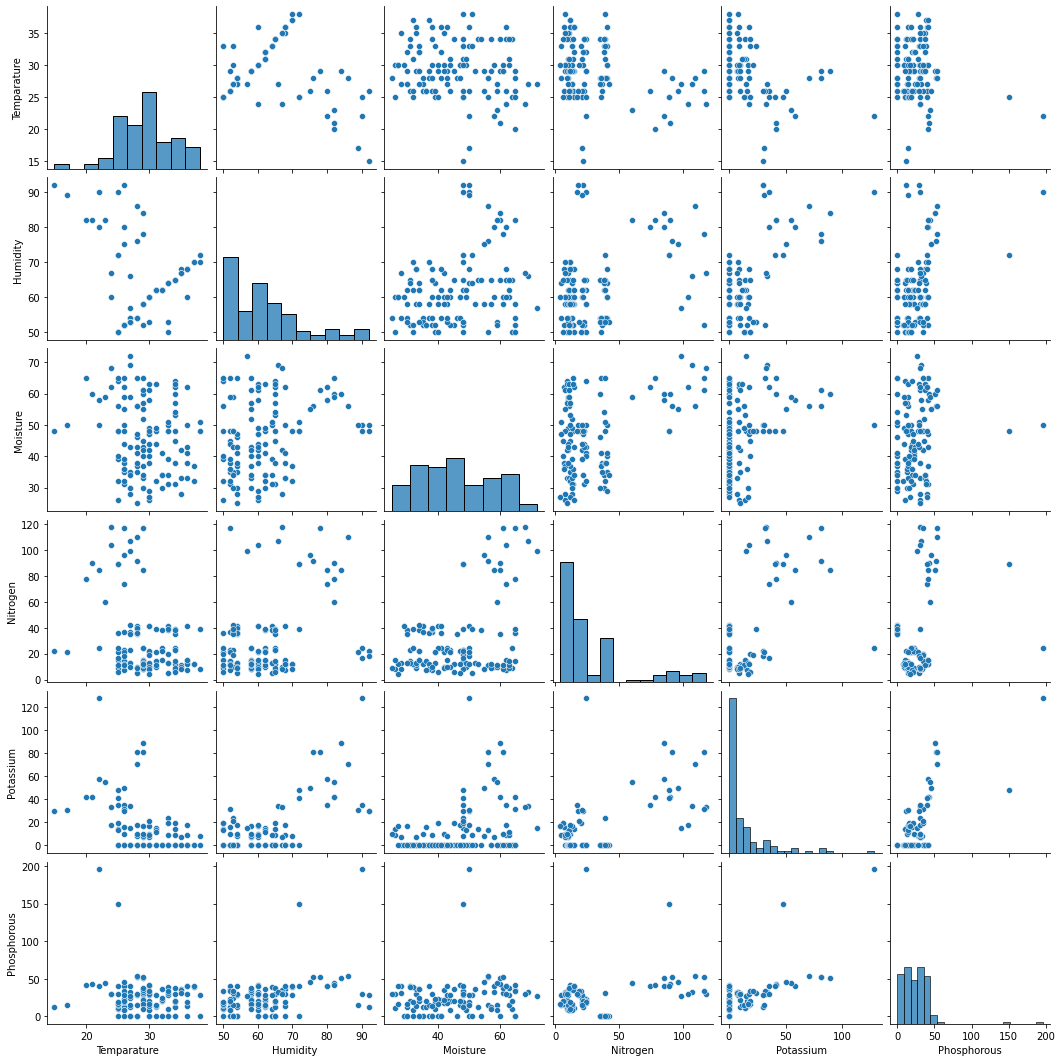

In [13]:
# pairplot for Fertilizer Prediction Dataset
sns.pairplot(fertilizer_dataset)
print('Pairplot for Fertilizer Dataset')

Histplot in Fertilizer Dataset


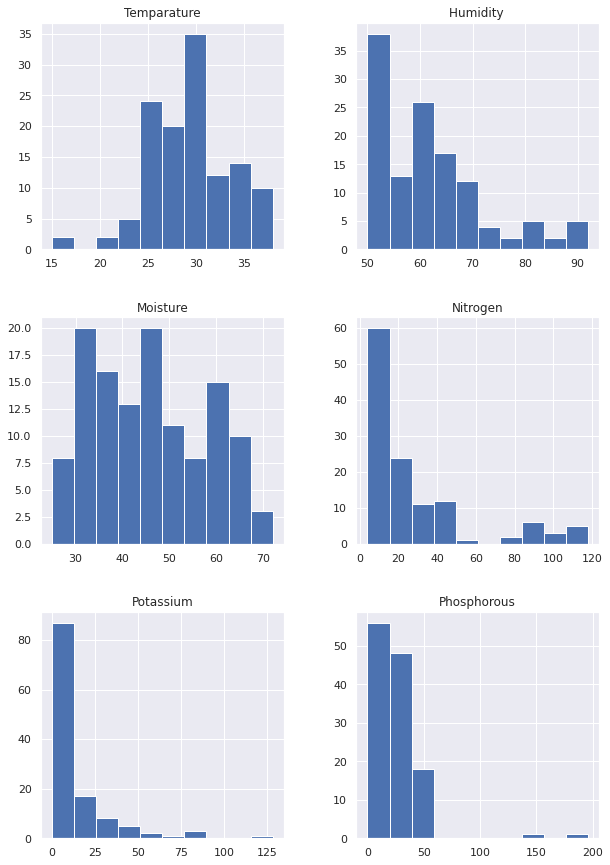

In [14]:
sns.set(style="darkgrid") # hide graph line
fertilizer_dataset.hist(figsize=(10,15))
print('Histplot in Fertilizer Dataset')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


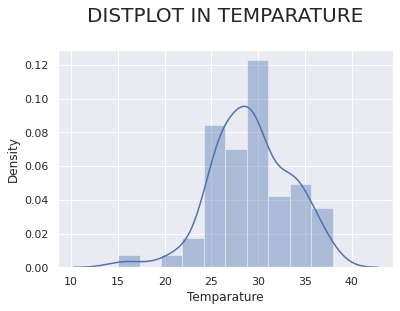

In [15]:
# Temparature
plt.figure(figsize=(6,4))
sns.distplot(fertilizer_dataset['Temparature'])
title = 'Distplot in Temparature\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


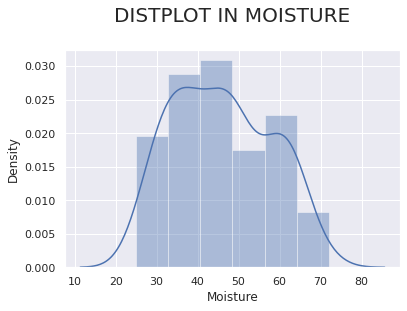

In [16]:
# Moisture
plt.figure(figsize=(6,4))
sns.distplot(fertilizer_dataset['Moisture'])
title = 'Distplot in Moisture\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

In [17]:
# Soil Type column values
fertilizer_dataset['Soil Type'].value_counts()

Black         39
Loamy         21
Sandy         20
Clayey        20
Red           19
sandy loam     5
Name: Soil Type, dtype: int64

In [18]:
# Crop Type column values
fertilizer_dataset['Crop Type'].value_counts()

Sugarcane      13
Cotton         12
Millets        11
Pulses         10
Paddy          10
Wheat           9
Ground Nuts     7
Tobacco         7
Barley          7
Oil seeds       7
Maize           6
Rice            5
Coffee          5
Banana          4
Mango           3
Apple           2
Orange          2
Coconut         2
Jute            2
Name: Crop Type, dtype: int64

Text(0.5, 1.0, 'Nitrogen vs Potassium of Fertilizer Dataset')

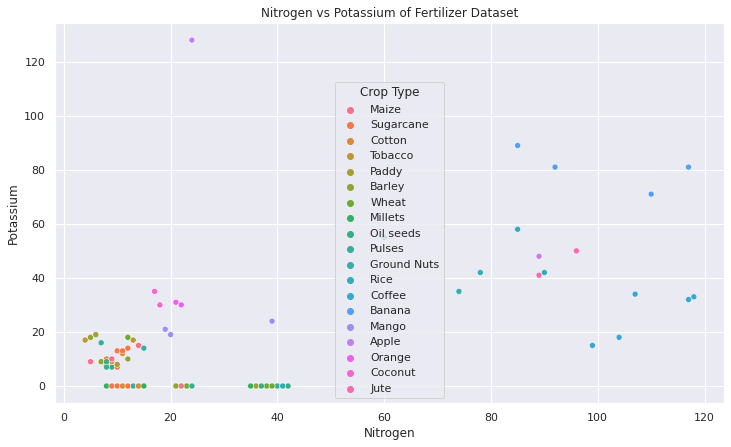

In [19]:
plt.figure(figsize=(12,7))
axis = sns.scatterplot(x='Nitrogen', y='Potassium', data=fertilizer_dataset, hue='Crop Type')
plt.title('Nitrogen vs Potassium of Fertilizer Dataset')

Text(0.5, 1.0, 'Nitrogen vs Potassium of Fertilizer Dataset')

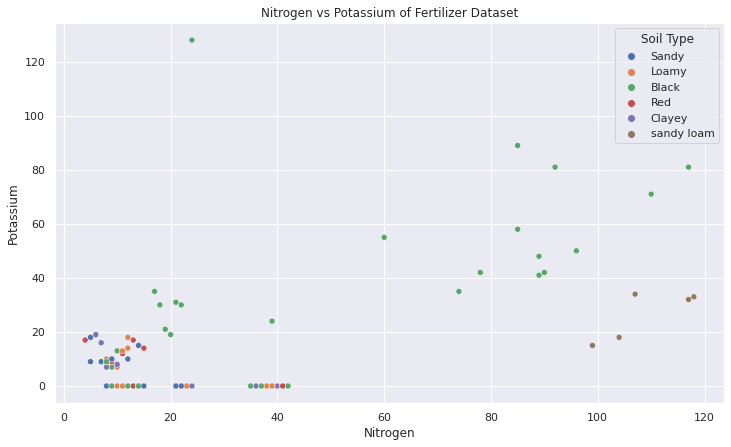

In [20]:
plt.figure(figsize=(12,7))
axis = sns.scatterplot(x='Nitrogen', y='Potassium', data=fertilizer_dataset, hue='Soil Type')
plt.title('Nitrogen vs Potassium of Fertilizer Dataset')

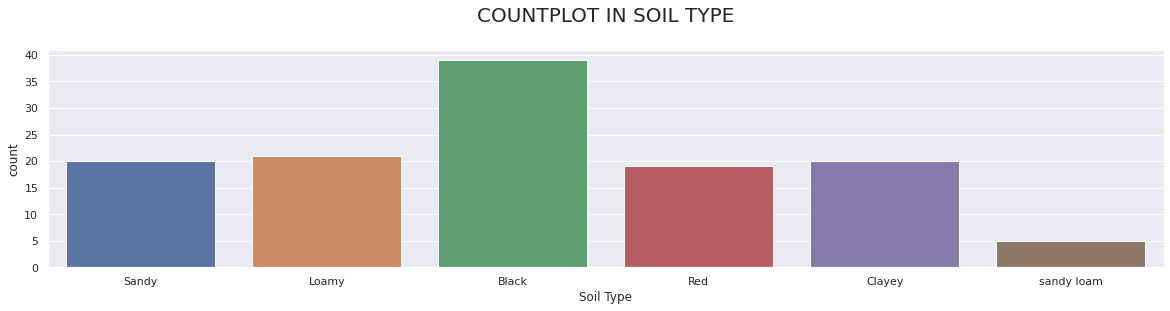

In [21]:
# Soil Type
plt.figure(figsize=(20,4))
sns.countplot(x='Soil Type', data=fertilizer_dataset)
title = 'CountPlot in Soil Type\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

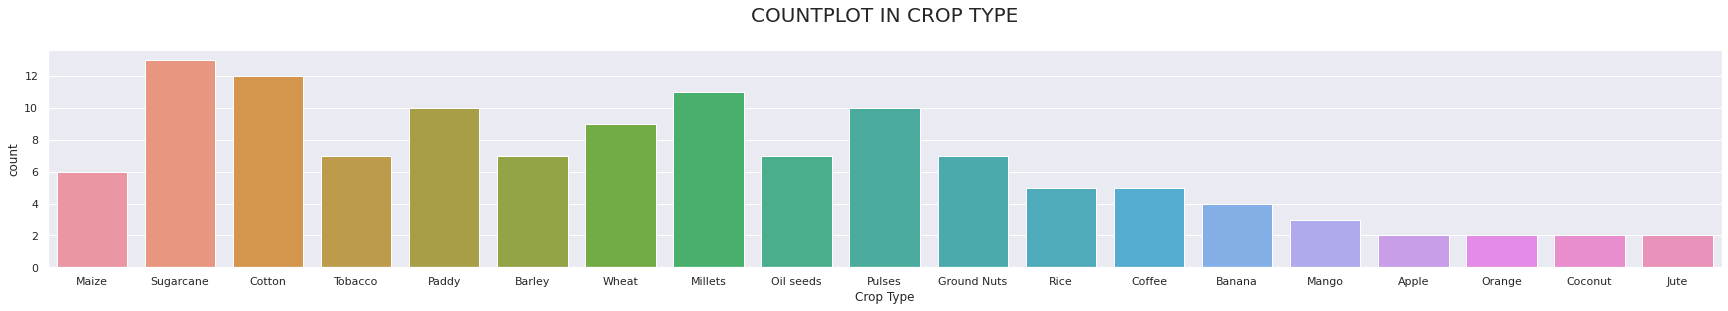

In [22]:
# Crop Type
plt.figure(figsize=(30,4))
sns.countplot(x='Crop Type', data=fertilizer_dataset)
title = 'CountPlot in Crop Type\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

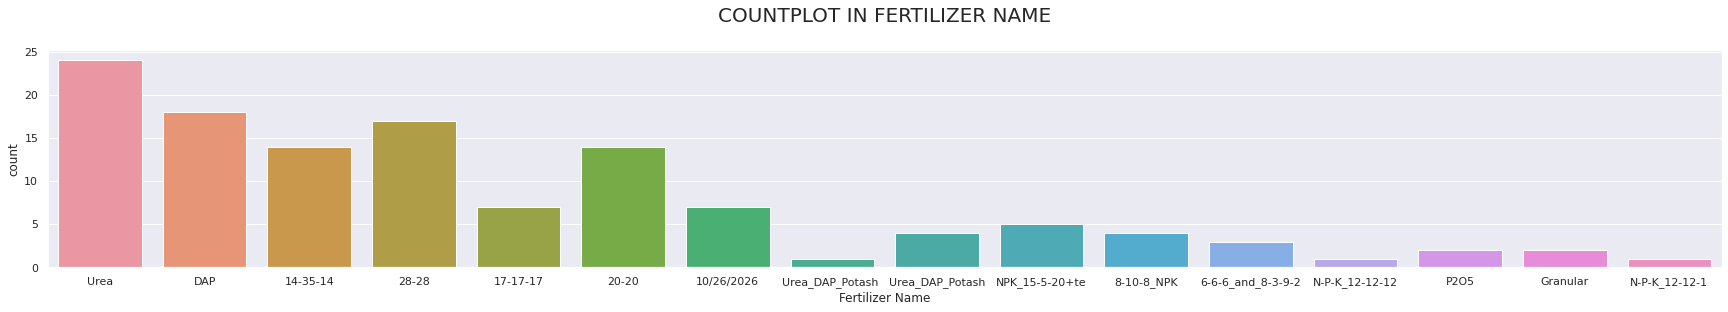

In [23]:
# Fertilizer Name
plt.figure(figsize=(30,4))
sns.countplot(x='Fertilizer Name', data=fertilizer_dataset)
title = 'CountPlot in Fertilizer Name\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

Understanding the correlation between various features in the dataset

In [24]:
correlation = fertilizer_dataset.corr()

In [25]:
print(correlation)

             Temparature  Humidity   Moisture  Nitrogen  Potassium  \
Temparature     1.000000  -0.083764 -0.164507 -0.336654  -0.400164   
Humidity       -0.083764   1.000000  0.281173  0.361715   0.651878   
Moisture       -0.164507   0.281173  1.000000  0.424199   0.357568   
Nitrogen       -0.336654   0.361715  0.424199  1.000000   0.584914   
Potassium      -0.400164   0.651878  0.357568  0.584914   1.000000   
Phosphorous    -0.162803   0.428975  0.175628  0.223361   0.668041   

             Phosphorous  
Temparature    -0.162803  
Humidity        0.428975  
Moisture        0.175628  
Nitrogen        0.223361  
Potassium       0.668041  
Phosphorous     1.000000  


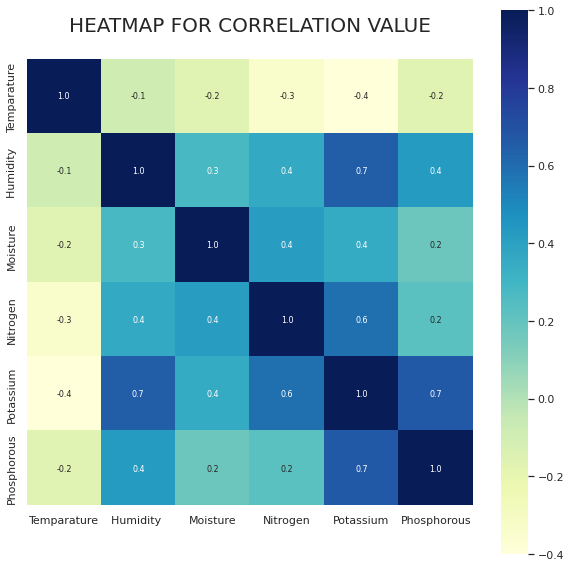

In [26]:
# constructing a beatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='YlGnBu')
title = 'Heatmap for correlation value\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

List of various crops Fertilizer Name

In [27]:
print("Number of various Fertilizer: ", len(fertilizer_dataset['Fertilizer Name'].unique()))
print("List of Fertilizer Name: ", fertilizer_dataset['Fertilizer Name'].unique())

Number of various Fertilizer:  16
List of Fertilizer Name:  ['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10/26/2026'
 'Urea_DAP_Potash ' 'Urea_DAP_Potash' 'NPK_15-5-20+te' '8-10-8_NPK'
 '6-6-6_and_8-3-9-2' 'N-P-K_12-12-12' 'P2O5' 'Granular' 'N-P-K_12-12-1']


In [28]:
fertilizer_dataset.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [29]:
# Soil Type column values
fertilizer_dataset['Soil Type'].value_counts()

Black         39
Loamy         21
Sandy         20
Clayey        20
Red           19
sandy loam     5
Name: Soil Type, dtype: int64

Label Encoding

In [30]:
encoder = LabelEncoder()

In [31]:
fertilizer_dataset['Soil Type'] = encoder.fit_transform(fertilizer_dataset['Soil Type'])

In [32]:
# Soil Type column values
fertilizer_dataset['Soil Type'].value_counts()

0    39
2    21
4    20
1    20
3    19
5     5
Name: Soil Type, dtype: int64

replace Soil Type and Crop Type data with values

In [33]:
# Crop Type column values
fertilizer_dataset['Crop Type'].value_counts()

Sugarcane      13
Cotton         12
Millets        11
Pulses         10
Paddy          10
Wheat           9
Ground Nuts     7
Tobacco         7
Barley          7
Oil seeds       7
Maize           6
Rice            5
Coffee          5
Banana          4
Mango           3
Apple           2
Orange          2
Coconut         2
Jute            2
Name: Crop Type, dtype: int64

In [34]:
# convert categorical data to numerical values
fertilizer_dataset.replace({'Crop Type': {'Rice': 0, 'Maize': 1, 'Coffee': 2, 'Sugarcane': 3, 'Cotton': 4,
                                     'Millets': 5, 'Paddy': 6, 'Pulses': 7, 'Wheat': 8, 'Barley': 9, 
                                     'Tobacco': 10, 'Oil seeds': 11, 'Ground Nuts': 12, 'Banana': 13 , 'Mango': 14,
                                     'Apple': 15, 'Orange': 16, 'Coconut': 17, 'Jute': 18, 
                                     },}, inplace=True)

In [35]:
# Crop Type column values
fertilizer_dataset['Crop Type'].value_counts()

3     13
4     12
5     11
7     10
6     10
8      9
12     7
10     7
9      7
11     7
1      6
0      5
2      5
13     4
14     3
15     2
16     2
17     2
18     2
Name: Crop Type, dtype: int64

In [36]:
fertilizer_dataset.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,1,37,0,0,Urea
1,29,52,45,2,3,12,0,36,DAP
2,34,65,62,0,4,7,9,30,14-35-14
3,32,62,34,3,10,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea


In [37]:
print("Number of various Fertilizer: ", len(fertilizer_dataset['Fertilizer Name'].unique()))
print("List of Fertilizer Name: ", fertilizer_dataset['Fertilizer Name'].unique())

Number of various Fertilizer:  16
List of Fertilizer Name:  ['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10/26/2026'
 'Urea_DAP_Potash ' 'Urea_DAP_Potash' 'NPK_15-5-20+te' '8-10-8_NPK'
 '6-6-6_and_8-3-9-2' 'N-P-K_12-12-12' 'P2O5' 'Granular' 'N-P-K_12-12-1']


In [38]:
# convert categorical data to numerical values
fertilizer_dataset.replace({'Fertilizer Name': {'Urea': 0, 'DAP': 1, '14-35-14': 2, '28-28': 3, '17-17-17': 4,
                                                '20-20': 5, '10/26/2026': 6, 'Urea_DAP_Potash ': 7, 
                                                'Urea_DAP_Potash': 8, 'NPK_15-5-20+te': 9, '8-10-8_NPK': 10, 
                                                '6-6-6_and_8-3-9-2': 11, 'N-P-K_12-12-12': 12, 'P2O5': 13, 'Granular': 14,
                                                  'N-P-K_12-12-1': 15},}, inplace=True)

In [39]:
fertilizer_dataset.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,1,37,0,0,0
1,29,52,45,2,3,12,0,36,1
2,34,65,62,0,4,7,9,30,2
3,32,62,34,3,10,22,0,20,3
4,28,54,46,1,6,35,0,0,0


Splitting the data set

In [40]:
X = fertilizer_dataset.drop(['Fertilizer Name'], axis=1)
Y = fertilizer_dataset['Fertilizer Name']

In [41]:
print(X)

     Temparature  Humidity   Moisture  Soil Type  Crop Type  Nitrogen  \
0             26         52        38          4          1        37   
1             29         52        45          2          3        12   
2             34         65        62          0          4         7   
3             32         62        34          3         10        22   
4             28         54        46          1          6        35   
..           ...        ...       ...        ...        ...       ...   
119           25         72        48          0         18        89   
120           25         72        48          0         15        89   
121           17         89        50          0         16        21   
122           25         90        48          0         17        17   
123           26         75        55          0         18        96   

     Potassium  Phosphorous  
0            0            0  
1            0           36  
2            9           30  
3  

In [42]:
print(Y)

0       0
1       1
2       2
3       3
4       0
       ..
119     0
120    15
121    13
122    14
123     0
Name: Fertilizer Name, Length: 124, dtype: int64


Splitting the data into Training data & Testing Data

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(124, 8) (86, 8) (38, 8)


Machine Learning Model Training

Random Forest

In [45]:
clf_random_forest=RandomForestClassifier()
clf_random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [46]:
random_forest_text_predictions = clf_random_forest.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,random_forest_text_predictions),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,random_forest_text_predictions)*100,'\n')
# print('Actual Outcome: \n', Y_test)
# print('\n Predicted Outcome: \n', random_forest_text_predictions)
print("Classification Report:", "\n", classification_report(Y_test,random_forest_text_predictions))

Accuracy Score :  94.73684210526315 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1

    accuracy                           0.95        38
   macro avg       0.86      0.86      0.86        38
weighted avg     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [47]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, random_forest_text_predictions))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, random_forest_text_predictions))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, random_forest_text_predictions))))

Mean_absolute_error:  0.05263157894736842
Mean_squared_error:  0.05263157894736842
Root mean_squared_error:  0.22941573387056177


Checking Actual Fertilizer Name and Predicted Fertilizer Name

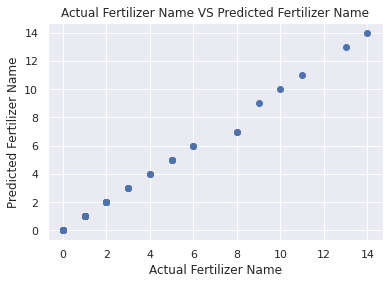

In [48]:
plt.scatter(Y_test, random_forest_text_predictions)
plt.xlabel('Actual Fertilizer Name')
plt.ylabel('Predicted Fertilizer Name')
plt.title('Actual Fertilizer Name VS Predicted Fertilizer Name')
plt.show()

XGBClassifier

In [49]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(objective='multi:softprob')

In [50]:
xgb_pred = xgb.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,xgb_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,xgb_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,xgb_pred))

Accuracy Score :  94.73684210526315 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.86      0.92         7
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         3
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1

    accuracy                           0.95        38
   macro avg       0.88      0.91      0.89        38
weighted avg       0.93      0.95      0.94        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, xgb_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, xgb_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, xgb_pred))))

Mean_absolute_error:  0.2631578947368421
Mean_squared_error:  2.1578947368421053
Root mean_squared_error:  1.4689774459950382


Checking Actual Fertilizer Name and Predicted Fertilizer Name

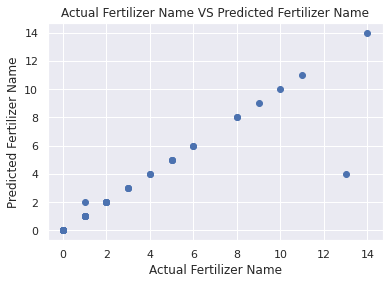

In [52]:
plt.scatter(Y_test, xgb_pred)
plt.xlabel('Actual Fertilizer Name')
plt.ylabel('Predicted Fertilizer Name')
plt.title('Actual Fertilizer Name VS Predicted Fertilizer Name')
plt.show()

LogisticRegression

In [53]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [54]:
log_reg_pred = log_reg.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,log_reg_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,log_reg_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,log_reg_pred))

Accuracy Score :  100.0 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [55]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, log_reg_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, log_reg_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, log_reg_pred))))

Mean_absolute_error:  0.0
Mean_squared_error:  0.0
Root mean_squared_error:  0.0


Checking Actual Fertilizer Name and Predicted Fertilizer Name

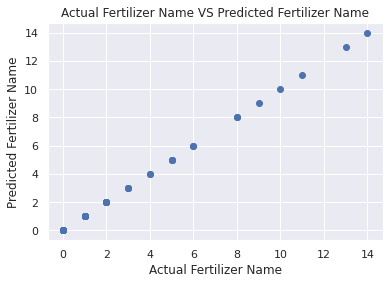

In [56]:
plt.scatter(Y_test, log_reg_pred)
plt.xlabel('Actual Fertilizer Name')
plt.ylabel('Predicted Fertilizer Name')
plt.title('Actual Fertilizer Name VS Predicted Fertilizer Name')
plt.show()

GaussianNB

In [57]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [58]:
gnb_pred = gnb.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,gnb_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,gnb_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,gnb_pred))

Accuracy Score :  89.47368421052632 

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1

    accuracy                           0.89        38
   macro avg       0.75      0.73      0.73        38
weighted avg       0.85      0.89      0.86        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, gnb_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, gnb_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, gnb_pred))))

Mean_absolute_error:  1.2105263157894737
Mean_squared_error:  14.473684210526315
Root mean_squared_error:  3.8044295512634103


Checking Actual Fertilizer Name and Predicted Fertilizer Name

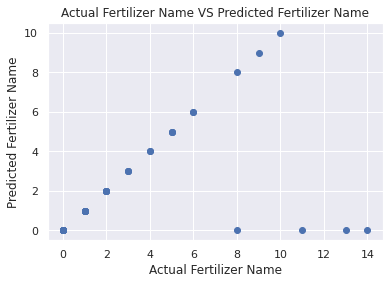

In [60]:
plt.scatter(Y_test, gnb_pred)
plt.xlabel('Actual Fertilizer Name')
plt.ylabel('Predicted Fertilizer Name')
plt.title('Actual Fertilizer Name VS Predicted Fertilizer Name')
plt.show()

KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [62]:
knn_pred = knn.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,knn_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,knn_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,knn_pred))

Accuracy Score :  78.94736842105263 

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       0.75      1.00      0.86         3
           4       0.00      0.00      0.00         2
           5       1.00      1.00      1.00         3
           6       0.20      0.50      0.29         2
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1

    accuracy                           0.79        38
   macro avg       0.52      0.58      0.54        38
weighted avg       0.71      0.79      0.74        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, knn_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, knn_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, knn_pred))))

Mean_absolute_error:  1.1842105263157894
Mean_squared_error:  8.342105263157896
Root mean_squared_error:  2.8882702891450265


Checking Actual Fertilizer Name and Predicted Fertilizer Name

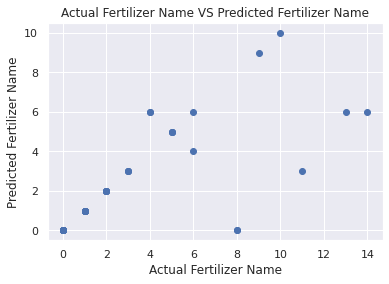

In [64]:
plt.scatter(Y_test, knn_pred)
plt.xlabel('Actual Fertilizer Name')
plt.ylabel('Predicted Fertilizer Name')
plt.title('Actual Fertilizer Name VS Predicted Fertilizer Name')
plt.show()

DecisionTreeClassifier

In [65]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [66]:
dtc_pred = dtc.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,svc_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,dtc_pred)*100,'\n')
print("Classification Report:", "\n",classification_report(Y_test,dtc_pred))

Accuracy Score :  89.47368421052632 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1

    accuracy                           0.89        38
   macro avg       0.71      0.71      0.71        38
weighted avg     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [67]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, dtc_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, dtc_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, dtc_pred))))

Mean_absolute_error:  0.10526315789473684
Mean_squared_error:  0.10526315789473684
Root mean_squared_error:  0.3244428422615251


Checking Actual Fertilizer Name and Predicted Fertilizer Name

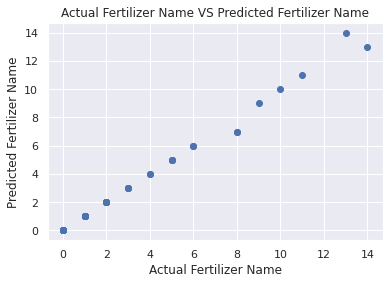

In [68]:
plt.scatter(Y_test, dtc_pred)
plt.xlabel('Actual Fertilizer Name')
plt.ylabel('Predicted Fertilizer Name')
plt.title('Actual Fertilizer Name VS Predicted Fertilizer Name')
plt.show()

Support Vector Clustering (SVC)

In [69]:
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [70]:
svc_pred = svc.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,svc_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,svc_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,svc_pred))

Accuracy Score :  57.89473684210527 

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.54      1.00      0.70         7
           2       0.00      0.00      0.00         5
           3       0.38      1.00      0.55         3
           4       0.00      0.00      0.00         2
           5       0.50      0.33      0.40         3
           6       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         1
          10       0.50      1.00      0.67         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1

    accuracy                           0.58        38
   macro avg       0.29      0.41      0.33        38
weighted avg       0.42      0.58      0.47        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, svc_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, svc_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, svc_pred))))

Mean_absolute_error:  1.5789473684210527
Mean_squared_error:  11.789473684210526
Root mean_squared_error:  3.4335803011158084


Checking Actual Fertilizer Name and Predicted Fertilizer Name

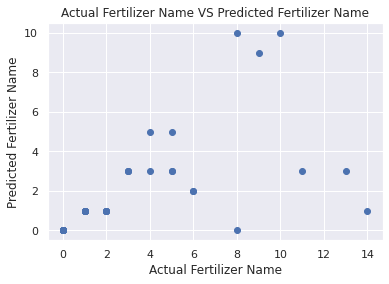

In [72]:
plt.scatter(Y_test, svc_pred)
plt.xlabel('Actual Fertilizer Name')
plt.ylabel('Predicted Fertilizer Name')
plt.title('Actual Fertilizer Name VS Predicted Fertilizer Name')
plt.show()

LightGBM Model

In [73]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, Y_train)

LGBMClassifier()

In [74]:
lgb_predictions=lgb_model.predict(X_test)
# Accuracy Score
print('Accuracy Score : ', accuracy_score(Y_test,lgb_predictions)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test, lgb_predictions))

Accuracy Score :  92.10526315789474 

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1

    accuracy                           0.92        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.91      0.92      0.91        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, lgb_predictions))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, lgb_predictions))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, lgb_predictions))))

Mean_absolute_error:  0.7105263157894737
Mean_squared_error:  6.605263157894737
Root mean_squared_error:  2.5700706523157564


Checking Actual Crop Name and Predicted Crop Name

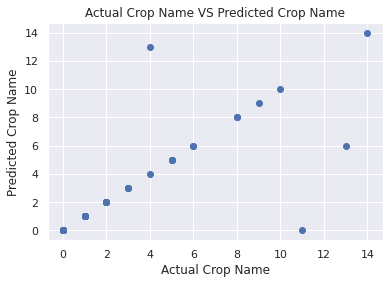

In [76]:
plt.scatter(Y_test, lgb_predictions)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

In [77]:
cat = CatBoostClassifier()
cat.fit(X_train, Y_train)

Learning rate set to 0.06982
0:	learn: 2.6753939	total: 52.5ms	remaining: 52.4s
1:	learn: 2.5999616	total: 62.7ms	remaining: 31.3s
2:	learn: 2.4976023	total: 74.5ms	remaining: 24.8s
3:	learn: 2.4454143	total: 84.3ms	remaining: 21s
4:	learn: 2.3958165	total: 95.7ms	remaining: 19s
5:	learn: 2.3450236	total: 106ms	remaining: 17.6s
6:	learn: 2.2871421	total: 117ms	remaining: 16.7s
7:	learn: 2.2013996	total: 125ms	remaining: 15.5s
8:	learn: 2.1323140	total: 138ms	remaining: 15.2s
9:	learn: 2.0913123	total: 147ms	remaining: 14.6s
10:	learn: 2.0227283	total: 166ms	remaining: 14.9s
11:	learn: 1.9797551	total: 174ms	remaining: 14.3s
12:	learn: 1.9348746	total: 184ms	remaining: 13.9s
13:	learn: 1.9025828	total: 193ms	remaining: 13.6s
14:	learn: 1.8677667	total: 204ms	remaining: 13.4s
15:	learn: 1.8010836	total: 209ms	remaining: 12.8s
16:	learn: 1.7626719	total: 218ms	remaining: 12.6s
17:	learn: 1.7384811	total: 230ms	remaining: 12.6s
18:	learn: 1.6822794	total: 235ms	remaining: 12.1s
19:	learn: 

In [78]:
cat_pred = cat.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,cat_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,cat_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,cat_pred))

Accuracy Score :  100.0 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [79]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, cat_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, cat_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, cat_pred))))

Mean_absolute_error:  0.0
Mean_squared_error:  0.0
Root mean_squared_error:  0.0


Checking Actual Crop Name and Predicted Crop Name

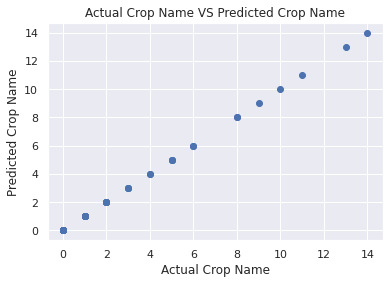

In [80]:
plt.scatter(Y_test, cat_pred)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

In [81]:
print('Accuracy Score : ', accuracy_score(Y_test,lgb_predictions)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,random_forest_text_predictions)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,cat_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,xgb_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,log_reg_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,gnb_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,knn_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,dtc_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,svc_pred)*100,'\n')

Accuracy Score :  92.10526315789474 

Accuracy Score :  94.73684210526315 

Accuracy Score :  100.0 

Accuracy Score :  94.73684210526315 

Accuracy Score :  100.0 

Accuracy Score :  89.47368421052632 

Accuracy Score :  78.94736842105263 

Accuracy Score :  89.47368421052632 

Accuracy Score :  57.89473684210527 



In [82]:
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [83]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [85]:
import xgboost
import catboost
MLA = [
    #Ensemble Methods
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    catboost.CatBoostClassifier(),

    xgboost.XGBClassifier(),

    lgb.LGBMClassifier(),
    
    #GLM
    linear_model.LogisticRegression(),
    
    #Navies Bayes
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),

    #Trees    
    tree.DecisionTreeClassifier(),
    
    ]

In [86]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    # fp, tp, th  = roc_curve(Y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, Y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, Y_test), 4)
    # MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(Y_test, predicted)
    # MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(Y_test, predicted)
    # MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)





    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

Learning rate set to 0.06982
0:	learn: 2.6753939	total: 7.1ms	remaining: 7.09s
1:	learn: 2.5999616	total: 11.6ms	remaining: 5.78s
2:	learn: 2.4976023	total: 19.8ms	remaining: 6.58s
3:	learn: 2.4454143	total: 28ms	remaining: 6.98s
4:	learn: 2.3958165	total: 36.3ms	remaining: 7.22s
5:	learn: 2.3450236	total: 47.2ms	remaining: 7.82s
6:	learn: 2.2871421	total: 52.7ms	remaining: 7.48s
7:	learn: 2.2013996	total: 58.7ms	remaining: 7.28s
8:	learn: 2.1323140	total: 66.8ms	remaining: 7.36s
9:	learn: 2.0913123	total: 69.6ms	remaining: 6.89s
10:	learn: 2.0227283	total: 72.7ms	remaining: 6.53s
11:	learn: 1.9797551	total: 77.1ms	remaining: 6.35s
12:	learn: 1.9348746	total: 85.3ms	remaining: 6.48s
13:	learn: 1.9025828	total: 94.1ms	remaining: 6.63s
14:	learn: 1.8677667	total: 99.1ms	remaining: 6.5s
15:	learn: 1.8010836	total: 102ms	remaining: 6.27s
16:	learn: 1.7626719	total: 105ms	remaining: 6.05s
17:	learn: 1.7384811	total: 108ms	remaining: 5.87s
18:	learn: 1.6822794	total: 110ms	remaining: 5.7s
19

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,MLA Name,MLA Train Accuracy,MLA Test Accuracy
2,CatBoostClassifier,1.0000,1.0000
5,LogisticRegression,1.0000,1.0000
0,RandomForestClassifier,1.0000,0.9474
3,XGBClassifier,1.0000,0.9474
4,LGBMClassifier,0.9767,0.9211
9,DecisionTreeClassifier,1.0000,0.9211
6,GaussianNB,1.0000,0.8947
7,KNeighborsClassifier,0.8721,0.7895
1,GaussianProcessClassifier,1.0000,0.6579
8,SVC,0.6395,0.5789


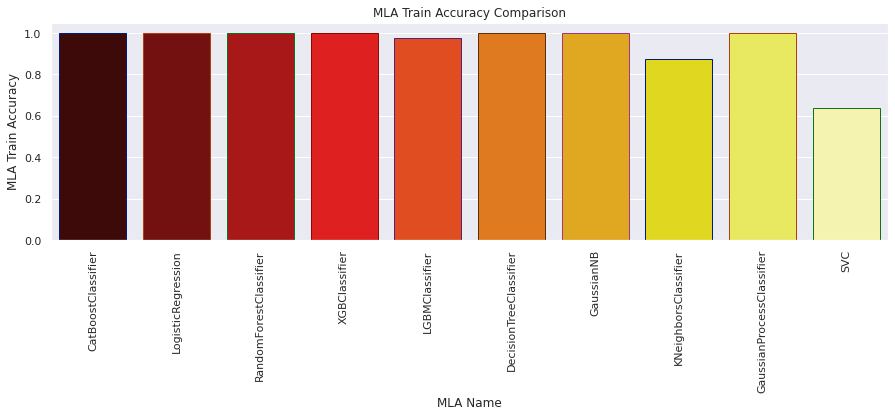

In [87]:
plt.subplots(figsize=(15,4))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

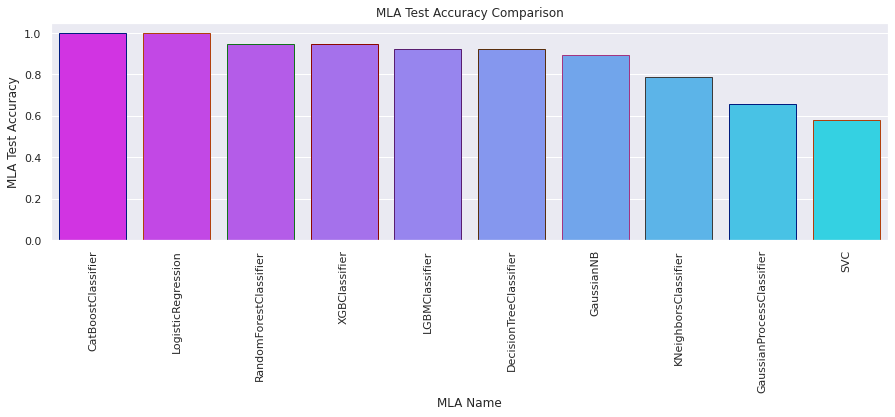

In [88]:
plt.subplots(figsize=(15,4))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='cool_r',edgecolor=sns.color_palette("dark", 8))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()